In [16]:
# Warmup 1: Write a function that converts any Fehrenheit temp to Celcius
# note: final exam will have about 25% material from earlier in the course

def fehr_to_celcius(f):
    return (5/9) * (f-32)


# test it by making several calls
fehr_to_celcius(212)

100.0

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15


# Lecture 39:  Plotting Applications

**Learning Objectives**

- Make a line plot on a series or on a DataFrame
- Use numpy to calculate a line of best fit
- Apply features of line plots and bar plots to visualize results of data investigations
- Clean Series data by dropping NaN values and by converting to int

- Make a stacked bar plot

## Line plots
- `SERIES.plot.line()`
- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot

<AxesSubplot:>

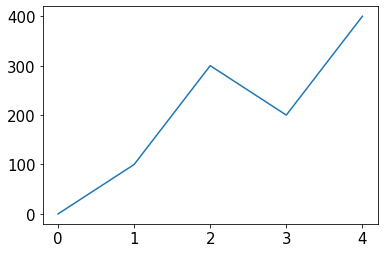

In [2]:
# when you make a series from a list, the default indices 0, 1, 2, ...
s = Series([0, 100, 300, 200, 400]) # y values
s.plot.line()

0       0
1     100
20    300
21    200
22    400
dtype: int64

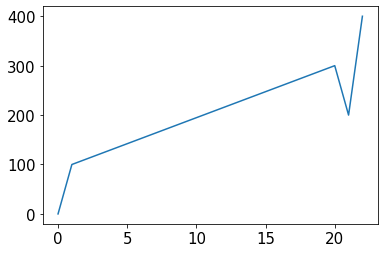

In [3]:
# you can make a series from a list and add on custom indices
#             y-values                       x-values
s = Series([0, 100, 300, 200, 400], index=[0, 1, 20, 21, 22])
s.plot.line()
s

0       0
20    100
21    300
22    200
1     400
dtype: int64

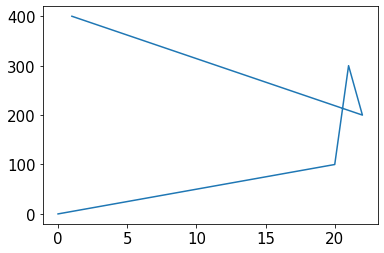

In [4]:
# be careful!  if the indices are out of order you get a mess
# pandas plots each (index, value) in the order given
s = Series([0, 100, 300, 200, 400], index=[0, 20, 21, 22, 1])
s.plot.line()
s

0       0
1     400
20    100
21    300
22    200
dtype: int64

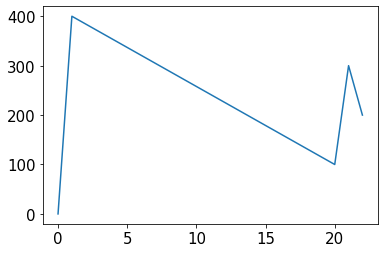

In [5]:
# you can fix this by calling sort_index()
s.sort_index().plot.line()
s.sort_index()

### Plotting lines from a DataFrame

In [8]:
# this DataFrame is made using a dict of lists
# City of Madison normal high and low (degrees F) by month
temp_df = DataFrame( 
    { "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]     }
)
temp_df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


### A Line Plot made from a DataFrame automatically plots all columns

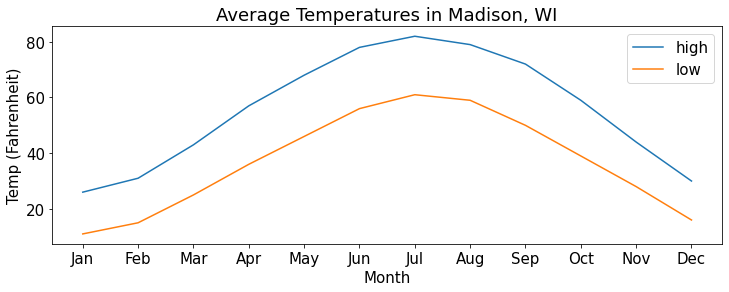

In [15]:
# you can add labels, ticks, and ticklabels to a line plot

ax = temp_df.plot.line(figsize=(12, 4))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticks(range(12))   # makes a range from 0 to 11
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
None # removes the text

### We can perform a calculation on an entire DataFrame
Let's change the entire DataFrame to Celcius

In [17]:
# call the function on the dataframe
celcius_df = fehr_to_celcius(temp_df)
celcius_df.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


In [18]:
# here is one way to add a horizontal line to our line plots

celcius_df["freezing"] = 0
celcius_df

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


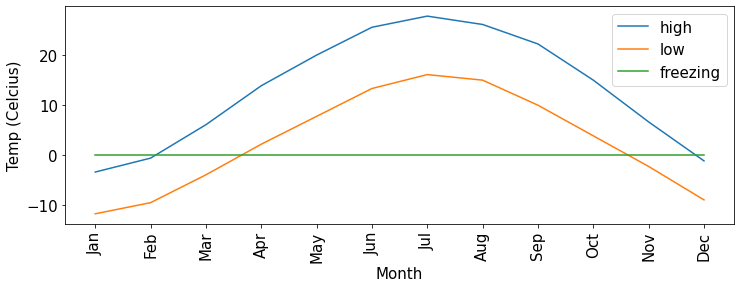

In [21]:
# this plots each column as lines
# with rotation for the tick labels
ax = celcius_df.plot.line(figsize = (12,4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
None

### Bar Plot Example w/ Fire Hydrants

- General review of Pandas
- Some new Bar Plot options


In [20]:
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [21]:
# grab just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [22]:
# make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what type is this? 

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
Red          9
green        9
orange       4
ORANGE       1
C            1
white        1
GREEN        1
Name: nozzle_color, dtype: int64

In [23]:
# TODO:  clean the data ......use str.upper()

color_counts= hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'Fire hydrant count')

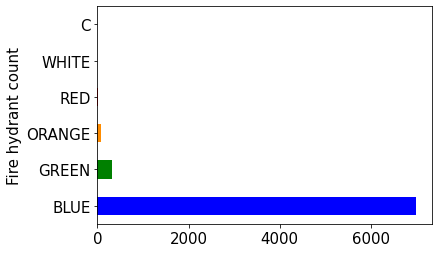

In [24]:
# make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color=["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

<AxesSubplot:>

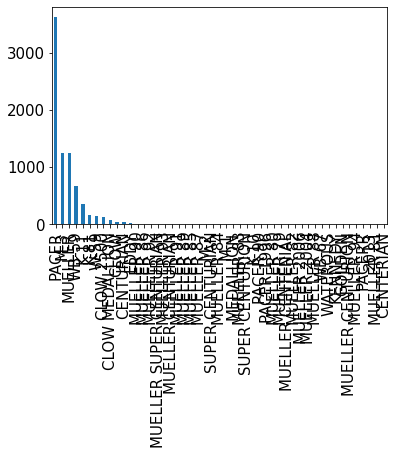

In [25]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

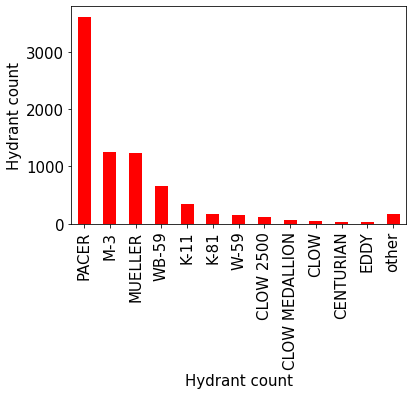

In [26]:
# let's just grab the top 12 
top12 = style_counts.iloc[:12]

# and them add an index to our Series for the sum of all the "other" for 
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### New Challenge:  Let's plot the year manufactured for the Pacer Style as opposed to other styles

In [27]:
# let's at the "year_manufactured" for just the Pacer "Style" and put that in a series

pacer_years = hdf [hdf["Style"] == "Pacer"]["year_manufactured"]

# note:  we can do this either way
#pacer_years = hdf["Style", "year_manufactured"][df["Style"] == "Pacer"]

pacer_years


0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [28]:
# then do the same for all the other data
other_years = hdf["year_manufactured"][hdf["Style"] != "Pacer"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

In [29]:
# let's do some arithmetic on this series to round each year down to the previous 10
# 1987 --> 1980,   2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [30]:
# now let's drop the NaN values, convert to int, and do value counts
pacer_decades = (pacer_years // 10 * 10).dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [31]:
# TODO:  do the same for other
other_decades = (other_years // 10 * 10).dropna()
other_decades = other_decades.astype(int).value_counts()
other_decades

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

In [32]:
# Build a DataFrame from a dictionary of key, Series
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


Text(0, 0.5, 'Hydrant Count')

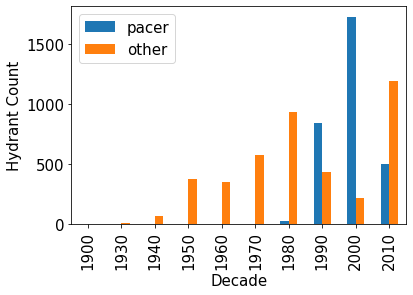

In [33]:
# make a bar plot

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

Text(0, 0.5, 'Hydrant Count')

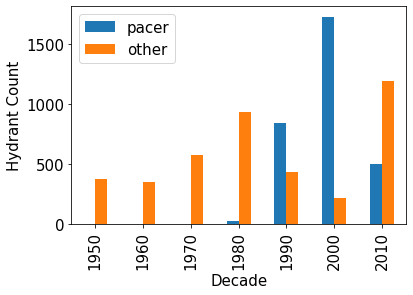

In [34]:
# change the x axis for data that we don't care about

ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

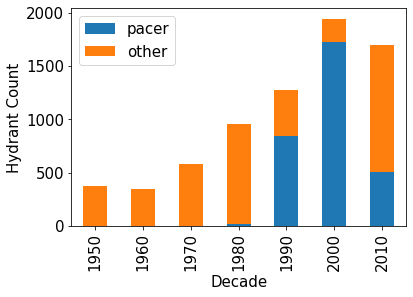

In [35]:
# make a Stacked Bar Chart!
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None